# Métrique de performance

Les métriques de performance permettent de mesurer l'éfficacité de notre modèle. En effet, les courbes ce suffisent pas, un modèle peut avoir des résultats très bon selon une métrique mais très mauvais selon une autre. Il existe plusieurs métrique en fonction du problème considèré. Ici j'ai choisi de vous présenter les métrique les plus utilisées dans le domaine de la régression. 

Pour l'ensemble des métriques j'utilise la notation suivante :
- $y_i$ est la $i^{ème}$ valeur attendue dans l'ensemble de données 
- $\hat{y_i}$ est la $i^{ème}$ valeur prédite par notre modèle
- $N$ correspond au nombre total de valeur

### Mean squared error

Mean squared error ou MSE (Le carré Moyen des erreurs) est une mesure d'erreur populaire pour les problèmes de régression.

Il s'agit également d'une fonction de perte importante pour les algorithmes ajustés ou optimisés à l'aide du cadrage des moindres carrés d'un problème de régression. L'expression "moindres carrés" fait référence à la minimisation de l'erreur quadratique moyenne entre les prédictions et les valeurs attendues.

L'MSE est calculée comme la moyenne des différences au carré entre les valeurs cibles prédites et attendues dans un ensemble de données.

$MSE = \frac{1}{N}*\sum_{n=1}^{N} {(y_i - \hat{y_i})^2} \$

La différence entre ces deux valeurs est élevée au carré, ce qui a pour effet de supprimer le signe et d'obtenir une valeur d'erreur positive.

L'élévation au carré a également pour effet de gonfler ou d'amplifier les erreurs importantes. En d'autres termes, plus la différence entre les valeurs prédites et attendues est grande, plus l'erreur positive au carré qui en résulte est importante. Cela a pour effet de "punir" davantage les modèles pour des erreurs plus importantes lorsque le MSE est utilisée comme fonction de perte. Cela a également pour effet de "punir" les modèles en gonflant le score d'erreur moyen lorsqu'il est utilisé comme métrique.

Le MSE est valeur à minimiser dans le cadre d’une régression simple ou multiple(voir [MSE](http://www.jybaudot.fr/Correl_regress/calcestim.html). La méthode est fondée sur la nullité de la moyenne des résidus. Mais la moyenne de leurs carrés n'est généralement pas nulle. Cette moyenne n'est autre que la variance résiduelle que l'on cherche à minimiser ([Cf. le théorème de König](http://www.jybaudot.fr/Stats/proprvar.html)).


### Root Mean Squared Error

L'erreur quadratique moyenne, ou RMSE, est une extension de l'erreur quadratique moyenne.

Il est important de noter que la racine carrée de l'erreur est calculée, ce qui signifie que les unités de la RMSE sont les mêmes que les unités originales de la valeur cible qui est prédite.

Par exemple, si votre variable cible a l'unité "euro", le score d'erreur RMSE aura également l'unité "euro" et non "euro au carré" comme le MSE.

Ainsi, il peut être courant d'utiliser la perte MSE pour former un modèle prédictif de régression, et d'utiliser la RMSE pour évaluer et rapporter ses performances. C’est ce que j’ai choisi de faire, j’utilise comme critère le MSE pour l’apprentissage

La RMSE peut être calculée comme suit :

$RMSE = \sqrt{\frac{1}{N}*\sum_{n=1}^{N} {(y_i - \hat{y_i})^2}}$

Nous pouvons reformuler la RMSE en termes de MSE comme suit :

$RMSE = \sqrt{MSE}$

Notez que la RMSE ne peut pas être calculée comme la moyenne de la racine carrée des valeurs de l'erreur quadratique. c'est-à-dire : 

$RMSE \neq \frac{1}{N}*\sum_{n=1}^{N} {\sqrt{(y_i - \hat{y_i})^2}}$

Il s'agit d'une erreur courante commise par les débutants et d'un exemple d'inégalité de Jensen.

### Mean Absolute Error

L'erreur absolue moyenne, ou MAE, est une mesure populaire car, comme la RMSE, les unités du score d'erreur correspondent aux unités de la valeur cible qui est prédite.

Contrairement à la RMSE, les variations de la MAE sont linéaires et donc intuitives.

C'est-à-dire que la MSE et la RMSE sanctionnent davantage les grandes erreurs que les petites, ce qui gonfle ou amplifie le score d'erreur moyen. Ceci est dû au carré de la valeur de l'erreur. La MAE n'accorde pas plus ou moins de poids aux différents types d'erreurs et, au contraire, les scores augmentent linéairement avec l'augmentation de l'erreur.

Comme son nom l'indique, le score MAE est calculé comme la moyenne des valeurs d'erreur absolues. L'erreur absolue ou $|.|$ est une fonction mathématique qui rend simplement un nombre positif. Par conséquent, la différence entre une valeur attendue et une valeur prédite peut être positive ou négative et est forcée d'être positive lors du calcul du MAE.

La MAE peut être calculée comme suit :

$MAE = \frac{1}{N}*\sum_{n=1}^{N} {|y_i - \hat{y_i}|}$


source : 
- https://en.wikipedia.org/wiki/Mean_squared_error
- https://en.wikipedia.org/wiki/Root-mean-square_deviation 
- https://en.wikipedia.org/wiki/Mean_absolute_error
- autre [lien](https://machinelearningmastery.com/regression-metrics-for-machine-learning/#:~:text=Regression%20predictive%20modeling%20are%20those,error%2C%20and%20mean%20absolute%20error).


# Evaluation du modèle

Pour évaluer notre modèle, nous devons utiliser des données qui non jamais servis lors de l'apprentissage. Ceci permet d'éviter les biais du à un sur-apprentissage.

Le modèle se base sur la prédiction temporelle à un pas de temps. C'est-à-dire, nous prédisons seulement la prochaine minute à partir des 5 dernières minutes.

On traite les données d'apprentissage avec notamment une normalisation standard pour facilité l'utilisation de notre modèle. Il s'agit des mêmes raisons que lors de l'entrainement. On aura des données de la plage de valeur sera comprise entre 0 et 1.

En effet notre modèle c'est entrainé avec des valeurs normées, il nous faut donc retranformer nos données. Ici, j'ai normé les données avec la norme standard:

$y = f(x) = \frac{x - \mu}{\sigma}$ où μ représente la moyenne et σ représente l'écart-type

la transformation inverse est donc : 

$f(x) = \frac{x - \mu}{\sigma} = y \Leftrightarrow x = y*{\sigma}+\mu = f^{-1}(y)$

Pour tester notre prédiction à un pas de temps, on ne réutilise pas la valeurs prédicte. Considèrons les valeurs $m_i$ comme étant la valeur du bitcoin à la $i^{ème}$ minute. On connais donc les valeurs réelles du bitcoin : $m_1 , m_2, m_3, m_4 , m_5, m_6 ,m_7 ...$

- la première prédition $p_1$ utilise les valeurs : $m_1 , m_2 , m_3, m_4, m_5 $
- la deuxième prédition $p_2$ utilise donc les valeurs : $m_2 , m_3 , m_4, m_5, m_6 $
- la troisème prédition $p_3$ utilise donc les valeurs : $m_3 , m_4 , m_5, m_6, m_7 $

On peut essayer faire de la prédiction sur toute la journée (faire de la prédiction à plusieurs pas de temps), cela nous permettera de voir la répercusion des erreurs commisent à chaque minute. Notre modèle n'étant pas concu pour cela, on devrait observer des métriques différentes. 

Pour tester notre prédiction à plusieurs pas de temps, on réutilise la valeurs prédicte. Considèrons les valeurs $m_i$ comme étant la valeur du bitcoin à la $i^{ème}$ minute. On connais donc les valeurs réelles du bitcoin : $m_1 , m_2, m_3, m_4 , m_5, m_6 ,m_7 ...$

- la première prédition $p_1$ utilise les valeurs : $m_1 , m_2 , m_3, m_4, m_5 $
- la deuxième prédition $p_2$ utilise donc les valeurs : $m_2 , m_3 , m_4, m_5, p_1 $
- la troisème prédition $p_3$ utilise donc les valeurs : $m_3 , m_4 , m_5, p_1, p_2 $




In [2]:
#general import
import torch
import torch.nn as nn
import datetime
from skorch import NeuralNet
from datetime import date
import numpy as np
import math
import matplotlib.pyplot as plt
import os
from torch.utils.data import Dataset
import pandas as pd
from datetime import datetime
from skorch.callbacks import LRScheduler
from sklearn.model_selection import GridSearchCV
import joblib

numFeature = 5

class LSTM(nn.Module):
    def __init__(self, input_size=1, hidden_layer_size=200, output_size=1,num_layers=1):
        super().__init__()
        self.hidden_layer_size = hidden_layer_size
        self.lstm = nn.LSTM(input_size,hidden_layer_size,num_layers,batch_first = True)
        # linear layer pour préduire 
        self.linear = nn.Linear(hidden_layer_size, output_size)

    def forward(self, input_batch):
        self.hidden_cell = (torch.zeros(1,input_batch.size(0),self.hidden_layer_size,device=input_batch.device),
                            torch.zeros(1,input_batch.size(0),self.hidden_layer_size,device=input_batch.device))
        lstm_out, self.hidden_cell = self.lstm(input_batch, self.hidden_cell)
        predictions = self.linear(lstm_out[:,-1,:])
        return predictions
     
net_regr = NeuralNetRegressor(
    LSTM,
    optimizer=torch.optim.Adam,
    max_epochs=1000,
    lr=0.001,
    callbacks=[
        LRScheduler(policy='StepLR', step_size=100, gamma=0.1)
    ],
    criterion=nn.MSELoss,
    device='cuda' 
)
    


In [4]:
# chargement du model 

model_name = "20220908_12_57"

print("load model")
net_regr.initialize()  # This is important!
net_regr.load_params(f_params='../resultat/save_models/'+model_name+'.pkl')

# sans charger un modéle existant
# net_regr = grid.best_estimator_




load model
Re-initializing module.
Re-initializing criterion.
Re-initializing optimizer.


In [12]:
# Fonction qui traite le DataFrame, il est subit la normalisation standard
# Input : 
#     - un DataFrame qu'on souhaite normaliser
# Output : 
#     - le DataFrame normaliser
#     - la moyenne (ou les moyennes) du DataFrame
#     - l'écart-type (ou les écarts-types) du DataFrame
def prepross_data(data):
    #enlève les valeurs vides
    data.dropna(axis=0,inplace=True)
    mean = data.mean()
    std = data.std()
    data =(data-mean)/std
    return mean,std,data

In [13]:
#Fonction qui prédit à un pas de temps à partir des valeurs réelles

def prediction_un_pas_temps(reel_value,numberData):
    
    #on a besoin des numFeature première valeur car on va se baser sur elles pour faire la première prédiction
    value_predict = reel_value[:numFeature].tolist()
    
    for index in range(0,numberData-numFeature):
        
        #sequence to make Tensor for the prediction with the model
        prediction_sequence = [[]]
        for value in reel_value[index:index+numFeature]:
            prediction_sequence[0].append([value])
        prediction_vector = torch.FloatTensor(prediction_sequence)
        predicted_value = net_regr.predict(prediction_vector).item()
        value_predict.append(predicted_value)
        
    return value_predict

In [14]:
#Prédicateur naif qui prédit la valeur précédante.
#La première valeur ne sera pas prédite

def prediction_naif(reel_value,numberData):
    
    #la première valeur ne sera pas prédit car il faut une valeur minimum.
    value_predict = reel_value[:1].tolist()
    
    for index in range(0,numberData-1):
        
        value_predict.append(reel_value[index])
        
    return value_predict

In [15]:
#Fonction qui prédit à plusieurs pas de temps à partir des valeurs réelles

def prediction_plusieurs_pas_temps(first_reel_value,numberData):
    
    #on a besoin des numFeature première valeur car on va se baser sur elles pour faire la première prédiction
    value_predict = first_reel_value.tolist()
    
    for index in range(0,numberData-numFeature):

        #sequence to make Tensor for the prediction with the model
        prediction_sequence = [[]]
        for value in value_predict[index:index+numFeature]:
            prediction_sequence[0].append([value])
        prediction_vector = torch.FloatTensor(prediction_sequence)
        predicted_value = net_regr.predict(prediction_vector).item()
        value_predict.append(predicted_value)
    return value_predict

In [16]:
def calcul_metrics(reel_value,estimate_value,numberData):
    erreurs = reel_value-estimate_value
    mse = np.sum(np.power(erreurs,2))/numberData
    mae = np.sum(np.abs(erreurs))/numberData
    rmse = np.sqrt(mse)
    metric = "Differente métrique pour la prédiction à un pas de temps: \n"
    metric += "Le carré moyen des erreurs MSE :" + str(mse) + "\n"
    metric += "l'erreur moyenne absolue MAE :" + str(mae) + "\n"
    metric += "L’erreur quadratique moyenne RMSE :" + str(rmse) + "\n\n\n"
    return metric

In [17]:
def affichage(reel_value,estimate_value,name,metrics):
    plt.figure(figsize=(18,12))
    plt.title('cours du bitcoin du : '+ name)
    plt.ylabel('valeur en euro')
    plt.xlabel('durée en minutes')
    plt.grid(True)
    plt.autoscale(axis='x', tight=True)
    plt.plot(reel_value,label="valeur réel")
    plt.plot(estimate_value,label="valeur prédict",ls='--')
    plt.legend()
    plt.figtext(0.11, -0.01, metrics )
    plt.savefig('../resultat/predictions/'+name+'.jpg')

In [18]:
def retransforme(values,std,mean):
    return values * std + mean


Test file : bitcoinEUR2022_09_02.csv
nombre de donnée : 1385


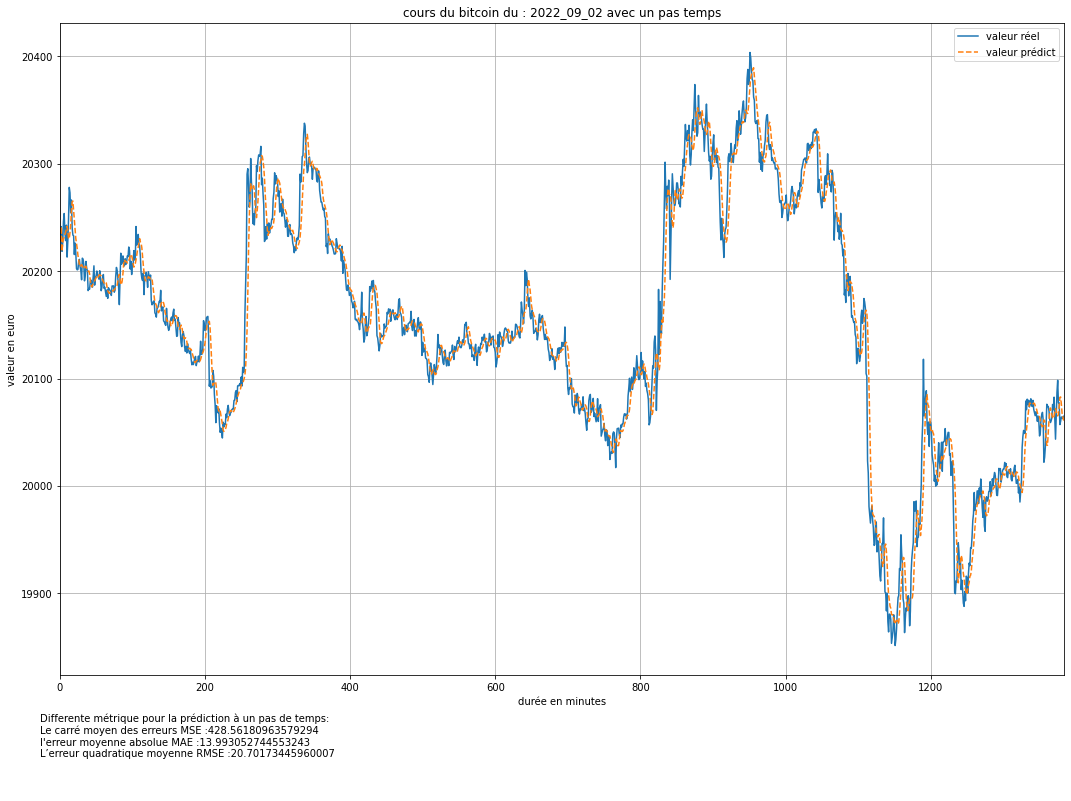

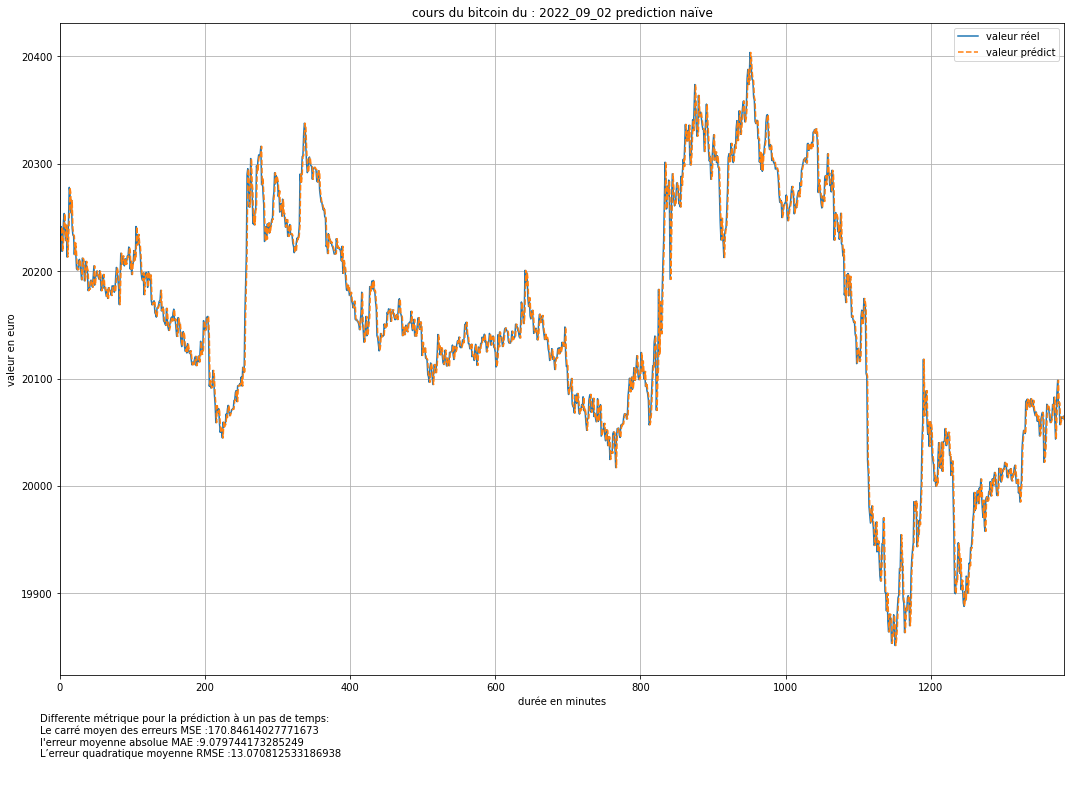

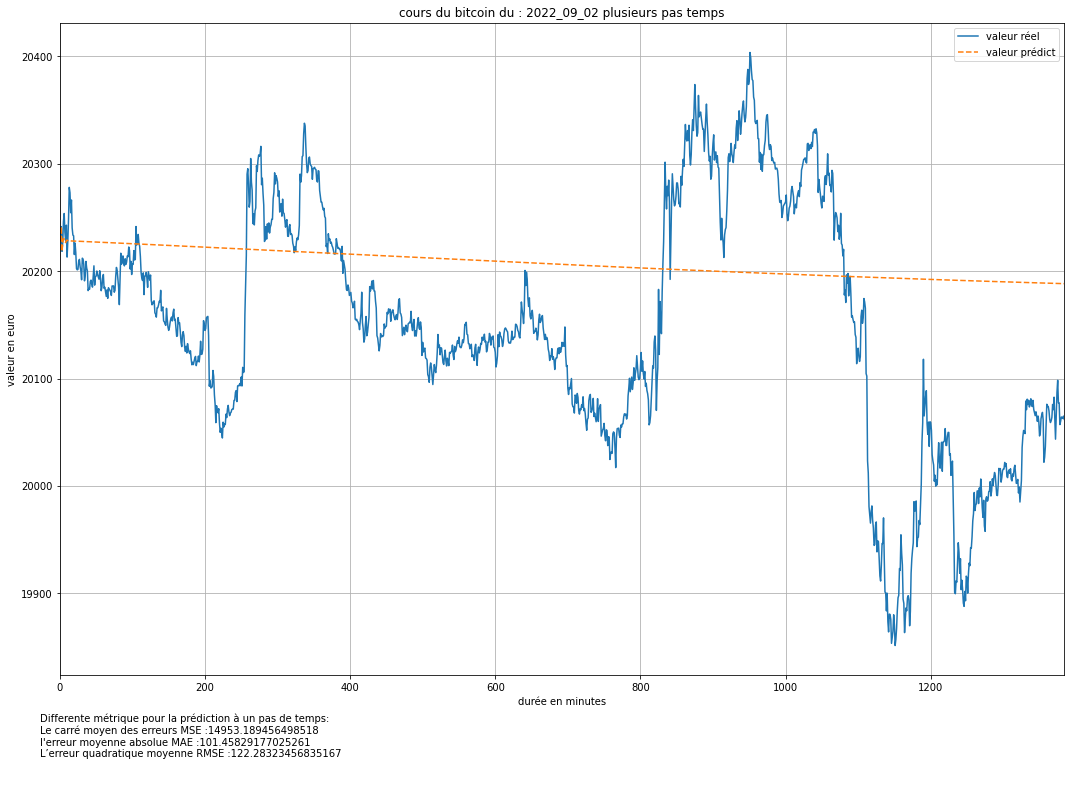

In [19]:
files = os.listdir("../data/test/")
for filename in files:
    print("\nTest file : "+filename)
    date_str = filename[10:-4]
    filename = "../data/test/"+filename
    
    #clear and prepross data
    newData = pd.read_csv(filename,sep=';')
    numberData=newData["cloture"].size
    print("nombre de donnée :",numberData)

    mean,std,newData = prepross_data(newData)
    
    #add prediction to data frame
    newData['valeur_predict_un_pas'] = prediction_un_pas_temps(newData['cloture'].to_numpy(),numberData)
    newData['valeur_predict_plusieurs_pas'] = prediction_plusieurs_pas_temps(newData['cloture'][:numFeature].to_numpy(),numberData)
    newData['valeur_predict_naif'] = prediction_naif(newData['cloture'].to_numpy(),numberData)
    
    #retransforme data and display it
    newData = retransforme(newData,std["cloture"],mean["cloture"])
    
    #calcul métrique prédiction à un pas de temps
    metric = calcul_metrics(newData['cloture'].to_numpy(),newData['valeur_predict_un_pas'].to_numpy(),numberData)
    affichage(newData['cloture'].to_numpy(),newData['valeur_predict_un_pas'].to_numpy(),date_str +" avec un pas temps",metric)
    
    #calcul métrique prédiction naïve
    metric = calcul_metrics(newData['cloture'].to_numpy(),newData['valeur_predict_naif'].to_numpy(),numberData)
    affichage(newData['cloture'].to_numpy(),newData['valeur_predict_naif'].to_numpy(),date_str +" prediction naïve",metric)
    
    #calcul prédiction sur une journée
    metric = calcul_metrics(newData['cloture'].to_numpy(),newData['valeur_predict_plusieurs_pas'].to_numpy(),numberData)
    affichage(newData['cloture'].to_numpy(),newData['valeur_predict_plusieurs_pas'].to_numpy(),date_str +" plusieurs pas temps",metric)
    
    
#     